In [ ]:
import requests
import json
from pprint import pprint
from google.colab import files
import pandas as pd
import yaml

In [ ]:
# Step 1: Upload the YAML file
uploaded = files.upload()

# Step 2: Get the file name
file_name = next(iter(uploaded))

# Step 3: Decode and load the YAML content
yaml_content = uploaded[file_name].decode('utf-8')
parsed_yaml = yaml.safe_load(yaml_content)

# Step 4: Extract API paths and operations into a list of dictionaries
api_details = []
for path, methods in parsed_yaml['paths'].items():
    for method, details in methods.items():
        api_detail = {
            'Path': path,
            'Method': method.upper(),
            'Summary': details.get('summary', 'No summary provided')
        }
        api_details.append(api_detail)

# Step 5: Create a DataFrame from the list of dictionaries
df = pd.DataFrame(api_details)

# Display the DataFrame
print(df)



Saving swagger.yaml to swagger.yaml
                                       Path Method  \
0                          /api/v1/kingdoms    GET   
1                     /api/v1/kingdoms/{id}    GET   
2                       /api/v1/subkingdoms    GET   
3                  /api/v1/subkingdoms/{id}    GET   
4                         /api/v1/divisions    GET   
5                    /api/v1/divisions/{id}    GET   
6                  /api/v1/division_classes    GET   
7             /api/v1/division_classes/{id}    GET   
8                   /api/v1/division_orders    GET   
9              /api/v1/division_orders/{id}    GET   
10                         /api/v1/families    GET   
11                    /api/v1/families/{id}    GET   
12                            /api/v1/genus    GET   
13                       /api/v1/genus/{id}    GET   
14                           /api/v1/plants    GET   
15                      /api/v1/plants/{id}    GET   
16                    /api/v1/plants/search   

In [ ]:
# Your API token
api_token = "fJ********"

# Corrected API endpoint
api_endpoint = "https://trefle.io/api/v1/kingdoms"

# Headers for authentication
headers = {
    'Authorization': f'Bearer {api_token}'
}

# Making the GET request
response = requests.get(api_endpoint, headers=headers)

# Check the response
if response.status_code == 200:
    print("Success:", response.json())
else:
    print("Error:", response.status_code)


Success: {'data': [{'id': 1, 'name': 'Plantae', 'slug': 'plantae', 'links': {'self': '/api/v1/kingdoms/plantae'}}], 'links': {'self': '/api/v1/kingdoms', 'first': '/api/v1/kingdoms?page=1', 'last': '/api/v1/kingdoms?page=1'}, 'meta': {'total': 1}}


In [ ]:
# Base API setup
api_token = "f"
headers = {'Authorization': f'Bearer {api_token}'}
base_url = "https://trefle.io/api/v1"

# Step 1: Fetch a list of plant IDs (this step is hypothetical and depends on API capabilities)
list_endpoint = f"{base_url}/plants"
response = requests.get(list_endpoint, headers=headers)
plants_list = response.json()['data']  # Assuming this endpoint returns a list of plants

# Step 2: Iterate over the list to fetch details for each plant
plant_details = []
for plant in plants_list:
    plant_id = plant['id']  # Assuming each plant in the list has an 'id' field
    detail_endpoint = f"{base_url}/plants/{plant_id}"
    detail_response = requests.get(detail_endpoint, headers=headers)
    if detail_response.status_code == 200:
        plant_details.append(detail_response.json()['data'])

# Step 3: Convert the collected plant details into a DataFrame
df = pd.DataFrame(plant_details)



In [ ]:
# Check the data types of each column
print(df.dtypes)


id                     int64
common_name           object
slug                  object
scientific_name       object
main_species_id        int64
image_url             object
year                   int64
bibliography          object
author                object
family_common_name    object
genus_id               int64
observations          object
vegetable             object
links                 object
main_species          object
genus                 object
family                object
species               object
subspecies            object
varieties             object
hybrids               object
forms                 object
subvarieties          object
sources               object
dtype: object


In [ ]:
df.head()

# Print the DataFrame's structure as a textual representation
print("DataFrame Structure:")
print("-" * 20)
for column in df.columns:
    print(f"{column} ({df[column].dtype})")
print("-" * 20)
print(f"Total Columns: {len(df.columns)}")
print(f"Total Rows: {len(df)}")


DataFrame Structure:
--------------------
id (int64)
common_name (object)
slug (object)
scientific_name (object)
main_species_id (int64)
image_url (object)
year (int64)
bibliography (object)
author (object)
family_common_name (object)
genus_id (int64)
observations (object)
vegetable (object)
links (object)
main_species (object)
genus (object)
family (object)
species (object)
subspecies (object)
varieties (object)
hybrids (object)
forms (object)
subvarieties (object)
sources (object)
--------------------
Total Columns: 24
Total Rows: 20


In [ ]:
image_urls = df["image_url"]

In [ ]:
# Display the first 5 image URLs
print(image_urls.head())


0    https://d2seqvvyy3b8p2.cloudfront.net/40ab8e7c...
1    https://bs.plantnet.org/image/o/9db58cbb3538a6...
2    https://bs.plantnet.org/image/o/f84a7d4fc2e627...
3    https://bs.plantnet.org/image/o/f8d7d6fe52e36d...
4    https://bs.plantnet.org/image/o/d788a757cd8bac...
Name: image_url, dtype: object


In [ ]:
# Total Images per page
total_image_urls = df["image_url"].apply(lambda x: x not in [None, ""]).sum()

total_image_urls

20

In [ ]:
#import requests

#api_token = ""
#headers = {'Authorization': f'Bearer {api_token}'}
#base_url = "https://trefle.io/api/v1/plants"
#params = {'page': 1, 'limit': 20}  # Adjust 'limit' as per API's allowed values

#all_plants = []

#while True:
 #   response = requests.get(base_url, headers=headers, params=params)
  #  data = response.json()
  #  all_plants.extend(data['data'])  # Assuming data is under 'data' key
  #  if 'next' in data['links']:  # Check if there's a link to the next page
  #      params['page'] += 1  # Increment the page number to fetch the next page
  #  else:
    #     break  # Exit the loop if there's no next page

# Now, `all_plants` contains data from all pages


In [ ]:
#def download_image(url, filename):
 #   response = requests.get(url)
 #   if response.status_code == 200:
  #      with open(filename, 'wb') as f:
  #          f.write(response.content)
  #  else:
   #     print(f"Failed to download {url}")

#api_token =
#headers = {'Authorization': f'Bearer {api_token}'}
#base_url = "https://trefle.io/api/v1/plants"
#params = {'page': 1, 'limit': 20}

#all_plants = []
#image_count = 0
#max_images = 10

#while True:
 #   response = requests.get(base_url, headers=headers, params=params)
  #  data = response.json()
  #  plants_data = data['data']

   # for plant in plants_data:
   #     if 'image_url' in plant and plant['image_url']:  # Check if image URL exists
    #        download_image(plant['image_url'], f"plant_{image_count + 1}.jpg")
     #       image_count += 1
      #      if image_count >= max_images:
       #         break  # Stop if we've downloaded 40 images

    #if image_count >= max_images:
     #   break  # Stop if we've downloaded 40 images

    #if 'next' in data['links']:  # Check if there's a link to the next page
     #   params['page'] += 1  # Increment the page number to fetch the next page
    #else:
     #   break  # Exit the loop if there's no next page or we've downloaded 40 images

#print(f"Downloaded {image_count} images.")


Downloaded 10 images.


In [ ]:
#def download_image(url, filename):
 #   response = requests.get(url)
 #   if response.status_code == 200:
  #      with open(filename, 'wb') as f:
  #          f.write(response.content)
  #      print(f"Downloaded image to {filename}")
  #  else:
   #     print(f"Failed to download {url}")

#api_token = ""
#headers = {'Authorization': f'Bearer {api_token}'}

# Adjust the endpoint to filter by the genus 'Abies' or any other taxonomic rank
#base_url = "https://trefle.io/api/v1/plants"
#params = {'filter[genus]': 'Abies', 'page': 1, 'limit': 20}

#image_count = 0
#max_images = 2

#while image_count < max_images:
 #   response = requests.get(base_url, headers=headers, params=params)
 #   data = response.json()

  #  if 'data' not in data or not data['data']:
  #      break  # Break if no data is returned

   # for plant in data['data']:
   #     if 'image_url' in plant and plant['image_url']:  # Check if image URL exists
    #        download_image(plant['image_url'], f"abies_{image_count + 1}.jpg")
    #        image_count += 1
    #        if image_count >= max_images:
    #            break  # Stop if we've reached the max images

    #if 'links' in data and 'next' in data['links'] and image_count < max_images:
     #   params['page'] += 1  # Increment the page number to fetch the next page
    #else:
     #   break  # Exit the loop if there's no next page or we've reached max images

#print(f"Downloaded {image_count} images.")


Downloaded image to abies_1.jpg
Downloaded image to abies_2.jpg
Downloaded 2 images.


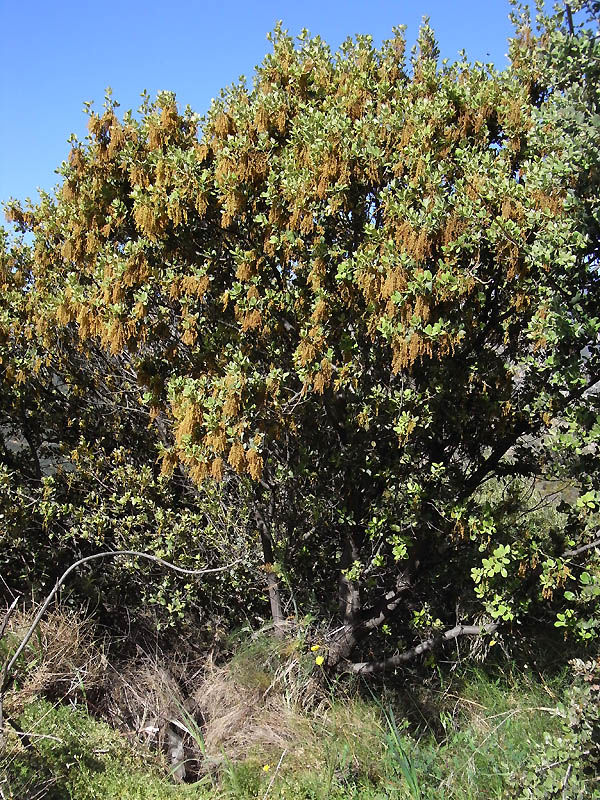

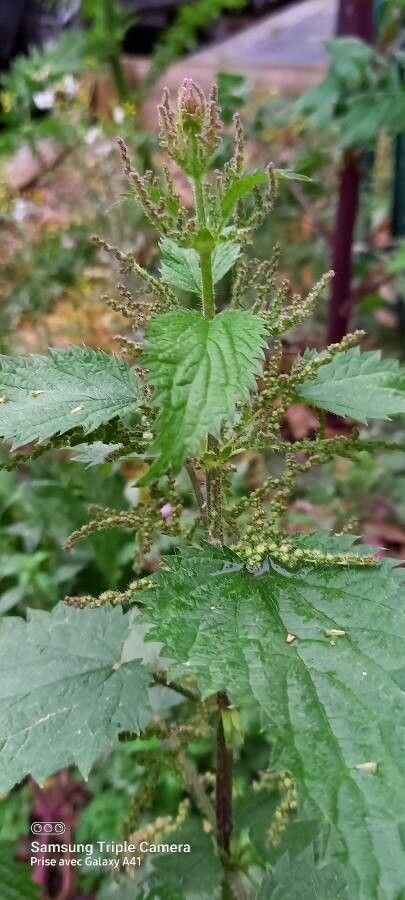

In [ ]:
#from IPython.display import Image, display

# Assuming you have a list of filenames for the downloaded images
#image_filenames = [f"abies_{i}.jpg" for i in range(1, image_count + 1)]

# Display each image
#for filename in image_filenames:
 #   display(Image(filename))


In [ ]:
#import requests

#api_token = ""  # Make sure this is your actual token
#headers = {'Authorization': f'Bearer {api_token}'}

#response = requests.get("https://trefle.io/api/v1/plants", headers=headers)
#print(response.status_code)
#response.json()


# Trefle.io API


Downloaded image to plant_1.jpg


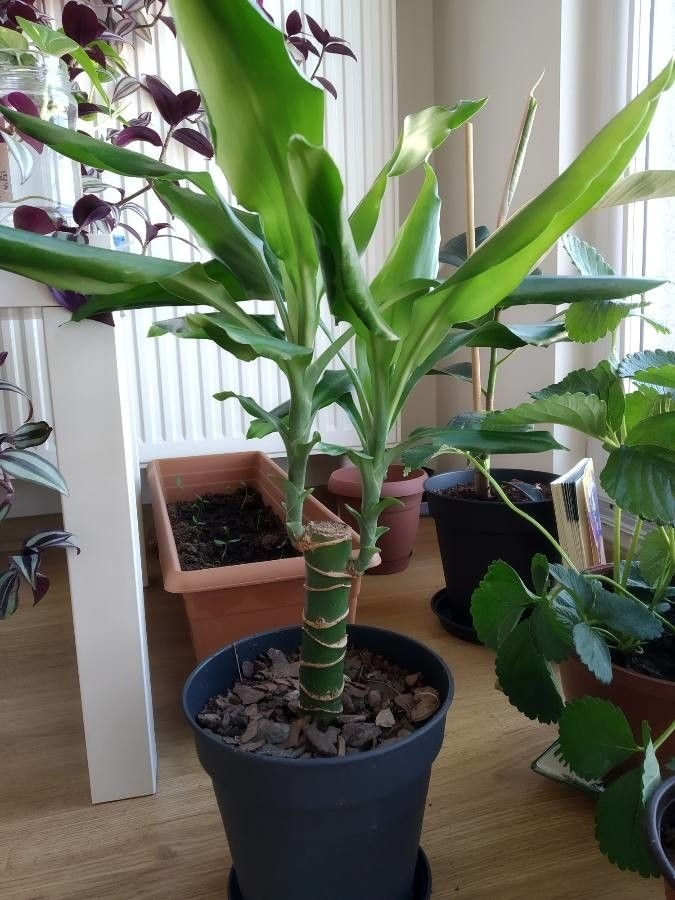

In [ ]:
import random
import cv2
import numpy as np
from IPython.display import Image, display

def download_image(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded image to {filename}")
    else:
        print(f"Failed to download {url}")

def is_green(image):
    # Placeholder function for green color detection
    # Implement your logic to determine if the image has green color
    return True

def has_oval_shape(image):
    # Placeholder function for oval shape detection
    # Implement your logic to determine if the image has oval shape
    return True

def has_leaf_shape(image):
    # Placeholder function for leaf-like shape detection
    # Implement your logic to determine if the image has leaf-like shape
    return True

api_token = ""
headers = {'Authorization': f'Bearer {api_token}'}

# Dracaena API endpoint for searching plants
dracaena_search_url = "https://trefle.io/api/v1/species/search"
params = {'q': 'Dracaena fragrans', 'limit': 10}  # Search specifically for Dracaena fragrans and limit to 3 images

response = requests.get(dracaena_search_url, headers=headers, params=params)
data = response.json()

if 'data' in data:
    plants = data['data']

    for i, plant in enumerate(plants[:3], 1):  # Download only the first 3 images
        if 'image_url' in plant and plant['image_url']:
            download_image(plant['image_url'], f"plant_{i}.jpg")

    # Load and preprocess downloaded images
    images = [cv2.imread(f"plant_{i}.jpg") for i in range(1, len(plants) + 1)]
    filtered_images = []

    for image in images:
        # Check if image has green color, oval shape, and leaf-like shape
        if is_green(image) and has_oval_shape(image) and has_leaf_shape(image):
            filtered_images.append(image)

    # Save and display filtered images
    for i, image in enumerate(filtered_images, 1):  # Start enumeration from 1
        filename = f"filtered_image_{i}.jpg"
        cv2.imwrite(filename, image)
        display(Image(filename))
else:
    print("No data found")



In [ ]:
from skimage.metrics import structural_similarity as ssim
from skimage.transform import resize


def download_image(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded image to {filename}")
    else:
        print(f"Failed to download {url}")

def preprocess_image(image):
    if image.dtype != np.uint8:
        image = (image * 255).astype(np.uint8)
    image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
    image_normalized = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)
    return image_normalized

def is_green_or_has_shape(image):
    image = np.uint8(image)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])
    mask = cv2.inRange(hsv_image, lower_green, upper_green)
    green_match = cv2.countNonZero(mask) / mask.size > 0.1

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    edges = cv2.Canny(blurred_image, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shape_match = len(contours) >= 1

    return green_match or shape_match

def calculate_ssi(image1, image2):
    # Convert both images to grayscale
    image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Ensure both images are of type float64 for SSI calculation
    image1_gray = image1_gray.astype(np.float64)
    image2_gray = image2_gray.astype(np.float64)

    # Resize the first image to match the second
    image1_resized = resize(image1_gray, image2_gray.shape, anti_aliasing=True)

    # Calculate SSI, ensuring the data_range matches the image dtype
    ssi_value = ssim(image1_resized, image2_gray, data_range=image1_resized.max() - image1_resized.min())
    return ssi_value

uploaded = files.upload()
filename = next(iter(uploaded))
user_image = cv2.imread(filename)
user_image_processed = preprocess_image(user_image)

api_token = "fJwhOIsNxnxTwoFD0Dnn0HAlXOmGkGmpqPo-7NMXYfk"
headers = {'Authorization': f'Bearer {api_token}'}
dracaena_search_url = "https://trefle.io/api/v1/species/search"
params = {'q': 'Dracaena fragrans', 'limit': 3}

response = requests.get(dracaena_search_url, headers=headers, params=params)
if response.status_code == 200:
    data = response.json()
    if 'data' in data:
        plants = data['data']
        for i, plant in enumerate(plants[:3], 1):
            if 'image_url' in plant and plant['image_url']:
                image_filename = f"plant_{i}.jpg"
                download_image(plant['image_url'], image_filename)
                trefle_image = cv2.imread(image_filename)
                trefle_image_processed = preprocess_image(trefle_image)

                if is_green_or_has_shape(user_image_processed) and is_green_or_has_shape(trefle_image_processed):
                    ssi_value = calculate_ssi(user_image_processed, trefle_image_processed)
                    print(f"Match found based on green color or shape with image {i}. SSI value: {ssi_value}")
                    break
    else:
        print("No data found in the response.")
else:
    print("Failed to fetch data from Trefle API:", response.status_code)


Saving dracaena_fragrans.jpeg to dracaena_fragrans (7).jpeg
Downloaded image to plant_1.jpg
Match found based on green color or shape with image 1. SSI value: 0.17928356478746119


# PIXEL-WISE Analysis

Saving dracaena_fragrans.jpeg to dracaena_fragrans (8).jpeg


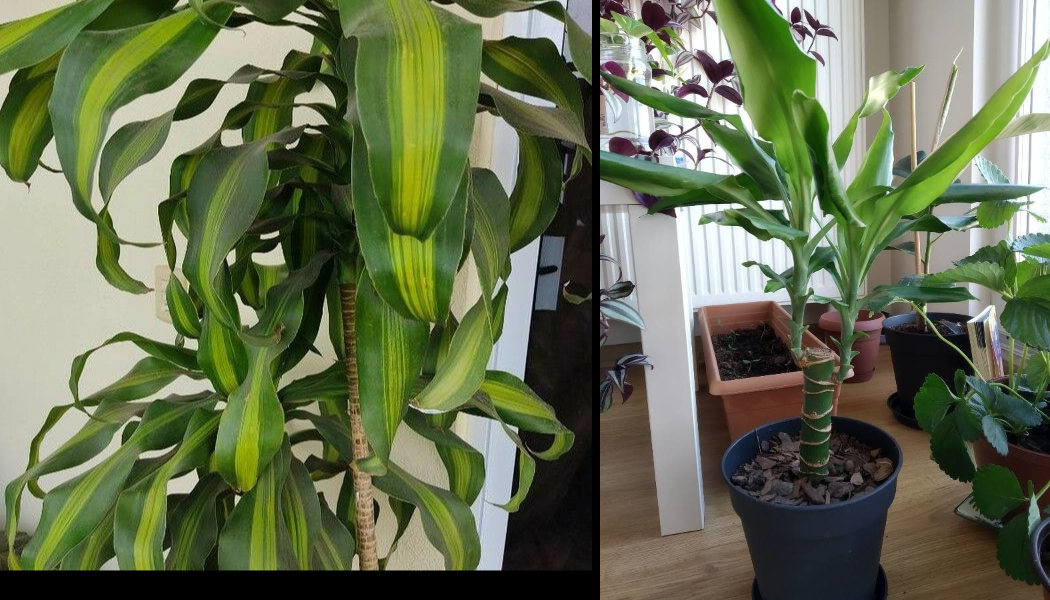

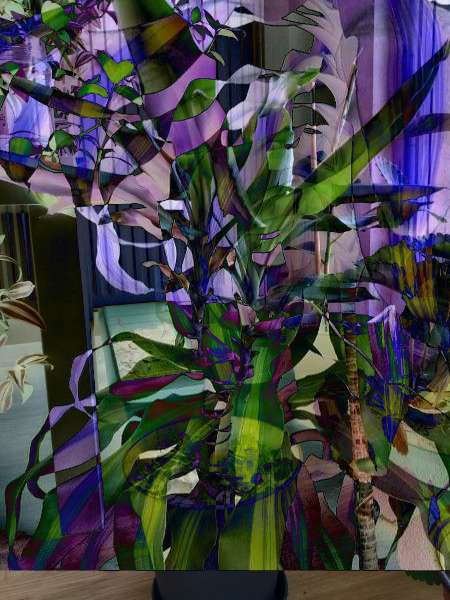

In [ ]:
from google.colab.patches import cv2_imshow

# Function to align two images
def align_images(image1, image2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Define motion model for image registration
    warp_mode = cv2.MOTION_TRANSLATION

    # Set the warp matrix size
    warp_matrix = np.eye(2, 3, dtype=np.float32)

    # Specify the number of iterations and the threshold
    number_of_iterations = 1000
    termination_eps = 1e-10

    # Run the ECC algorithm to get the motion matrix
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
    (cc, warp_matrix) = cv2.findTransformECC(gray1, gray2, warp_matrix, warp_mode, criteria)

    # Use the motion matrix to align the first image with the second image
    aligned_image = cv2.warpAffine(image1, warp_matrix, (image1.shape[1], image1.shape[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)

    return aligned_image

# Function to resize image
def resize_image(image, height):
    aspect_ratio = float(image.shape[1]) / float(image.shape[0])
    width = int(height * aspect_ratio)
    resized_image = cv2.resize(image, (width, height))
    return resized_image

# Load the Trefle image
trefle_image = cv2.imread("plant_1.jpg")

# Upload the picture from your local folder in Google Colab
uploaded = files.upload()

# Get the filename of the uploaded picture
filename = next(iter(uploaded))

# Load the uploaded image
uploaded_image = cv2.imread(filename)

# Check if images are loaded successfully
if trefle_image is not None and uploaded_image is not None:
    # Align the uploaded image with the Trefle image
    aligned_uploaded_image = align_images(uploaded_image, trefle_image)

    # Resize the Trefle image to match the height of the aligned uploaded image
    resized_trefle_image = resize_image(trefle_image, aligned_uploaded_image.shape[0])

    # Display the aligned images side by side for comparison
    cv2_imshow(np.concatenate((aligned_uploaded_image, resized_trefle_image), axis=1))

    # Ensure that both images have the same dimensions
    height = min(aligned_uploaded_image.shape[0], resized_trefle_image.shape[0])
    width = min(aligned_uploaded_image.shape[1], resized_trefle_image.shape[1])
    aligned_uploaded_image = aligned_uploaded_image[:height, :width]
    resized_trefle_image = resized_trefle_image[:height, :width]

    # Compute the pixel-wise absolute difference
    abs_diff = cv2.absdiff(aligned_uploaded_image, resized_trefle_image)

    # Display the absolute difference image
    cv2_imshow(abs_diff)
else:
    print("Error: One or both of the images could not be loaded.")



Saving dracaena_fragrans.jpeg to dracaena_fragrans (11).jpeg


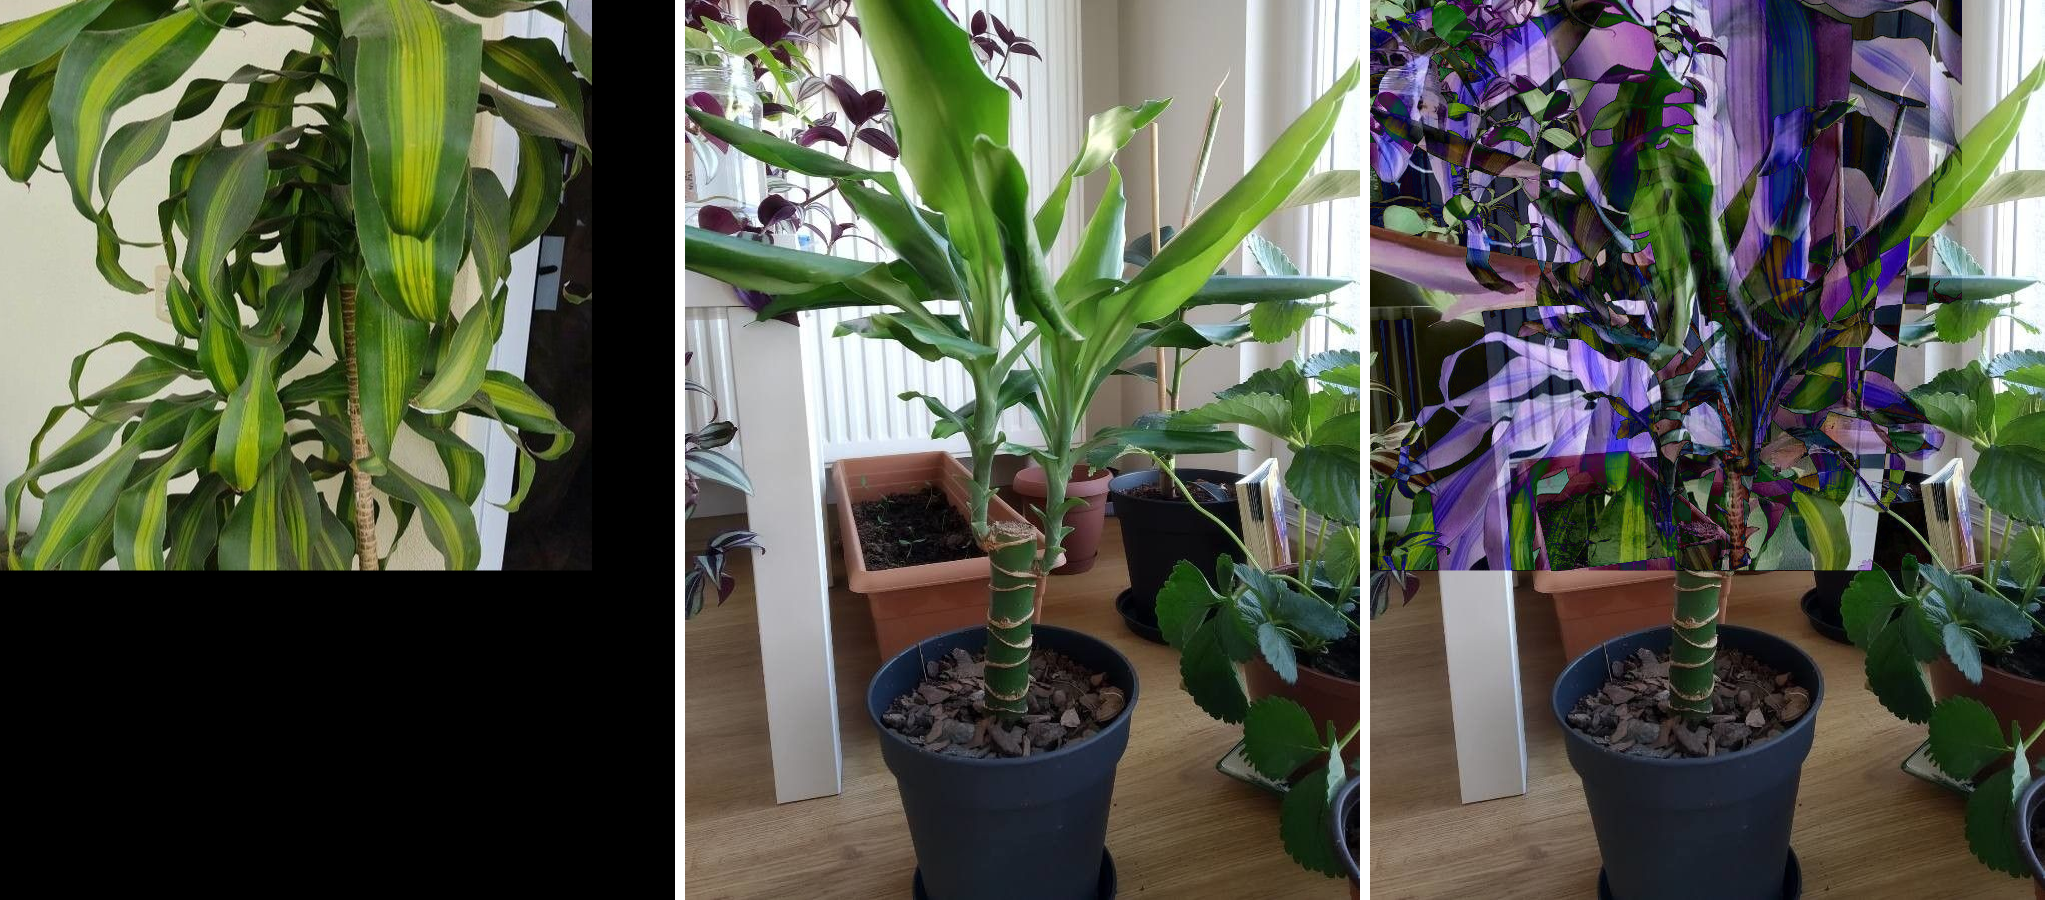

Difference percentage: 31.04%


In [ ]:
from google.colab.patches import cv2_imshow

def align_images(image1, image2):
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    warp_mode = cv2.MOTION_TRANSLATION
    warp_matrix = np.eye(2, 3, dtype=np.float32)
    number_of_iterations = 1000
    termination_eps = 1e-10
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations, termination_eps)
    _, warp_matrix = cv2.findTransformECC(gray1, gray2, warp_matrix, warp_mode, criteria)
    aligned_image = cv2.warpAffine(image1, warp_matrix, (image2.shape[1], image2.shape[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    return aligned_image

def resize_image(image, height):
    aspect_ratio = float(image.shape[1]) / float(image.shape[0])
    width = int(height * aspect_ratio)
    resized_image = cv2.resize(image, (width, height))
    return resized_image

def create_composite_image(images, separator_width=10, background_color=(255, 255, 255)):
    max_height = max(image.shape[0] for image in images)
    total_width = sum(image.shape[1] for image in images) + separator_width * (len(images) - 1)
    composite_image = np.full((max_height, total_width, 3), background_color, dtype=np.uint8)
    current_x = 0
    for image in images:
        if image.shape[0] != max_height:
            image = cv2.resize(image, (int(image.shape[1] * (max_height / image.shape[0])), max_height))
        composite_image[:image.shape[0], current_x:current_x+image.shape[1]] = image
        current_x += image.shape[1] + separator_width
    composite_image = composite_image[:, :current_x-separator_width]
    return composite_image

# Load and align images
trefle_image = cv2.imread("plant_1.jpg")
uploaded = files.upload()
filename = next(iter(uploaded))
uploaded_image = cv2.imread(filename)

if trefle_image is not None and uploaded_image is not None:
    aligned_uploaded_image = align_images(uploaded_image, trefle_image)
    resized_trefle_image = resize_image(trefle_image, aligned_uploaded_image.shape[0])

    height = min(aligned_uploaded_image.shape[0], resized_trefle_image.shape[0])
    width = min(aligned_uploaded_image.shape[1], resized_trefle_image.shape[1])
    aligned_uploaded_image = aligned_uploaded_image[:height, :width]
    resized_trefle_image = resized_trefle_image[:height, :width]

    abs_diff = cv2.absdiff(aligned_uploaded_image, resized_trefle_image)

    composite_image = create_composite_image([aligned_uploaded_image, resized_trefle_image, abs_diff])
    cv2_imshow(composite_image)
    cv2.imwrite('composite_image.jpg', composite_image)

    # Corrected Numeric analysis for difference
    max_possible_diff = abs_diff.size * 255
    total_diff = np.sum(abs_diff)
    diff_percentage = (total_diff / max_possible_diff) * 100
    print(f"Difference percentage: {diff_percentage:.2f}%")
else:
    print("Error: One or both of the images could not be loaded.")



# Feature Extraction

Saving dracaena_fragrans.jpeg to dracaena_fragrans (12).jpeg


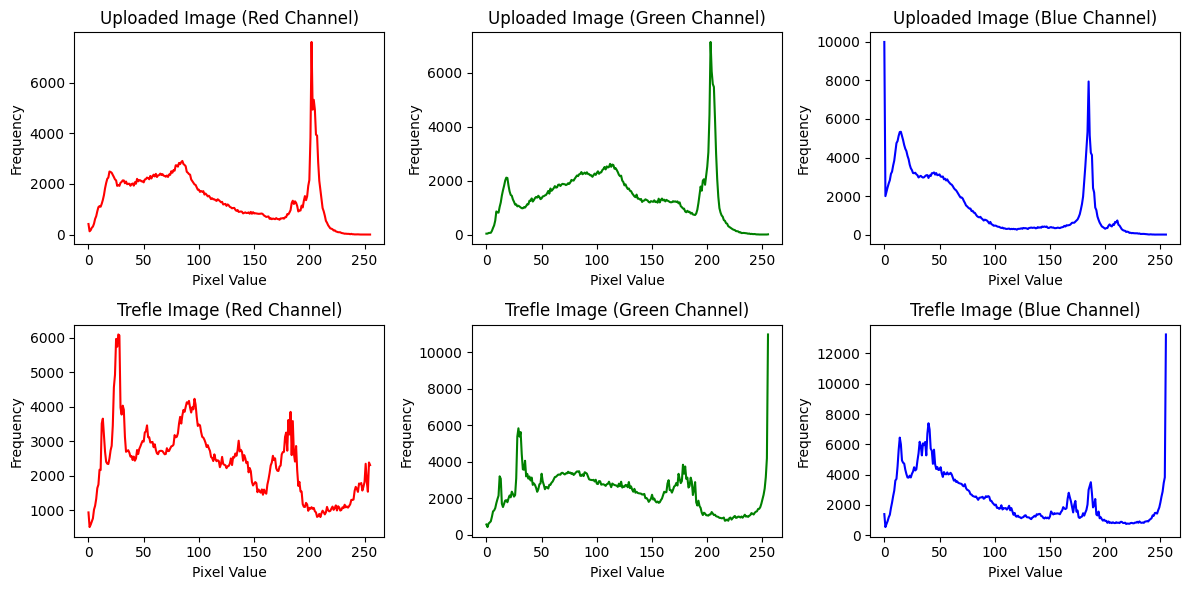

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


# Load the Trefle image
trefle_image = cv2.imread("plant_1.jpg")

# Upload the picture from your local folder in Google Colab
uploaded = files.upload()

# Get the filename of the uploaded picture
filename = next(iter(uploaded))

# Load the uploaded image
uploaded_image = cv2.imread(filename)

# Check if images are loaded successfully
if trefle_image is not None and uploaded_image is not None:
    # Convert images to RGB (OpenCV loads images in BGR format)
    trefle_image_rgb = cv2.cvtColor(trefle_image, cv2.COLOR_BGR2RGB)
    uploaded_image_rgb = cv2.cvtColor(uploaded_image, cv2.COLOR_BGR2RGB)

    # Compute histograms for each channel (R, G, B) for both images
    hist_uploaded_r = cv2.calcHist([uploaded_image_rgb], [0], None, [256], [0, 256])
    hist_uploaded_g = cv2.calcHist([uploaded_image_rgb], [1], None, [256], [0, 256])
    hist_uploaded_b = cv2.calcHist([uploaded_image_rgb], [2], None, [256], [0, 256])

    hist_trefle_r = cv2.calcHist([trefle_image_rgb], [0], None, [256], [0, 256])
    hist_trefle_g = cv2.calcHist([trefle_image_rgb], [1], None, [256], [0, 256])
    hist_trefle_b = cv2.calcHist([trefle_image_rgb], [2], None, [256], [0, 256])

    # Plot histograms
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 3, 1)
    plt.plot(hist_uploaded_r, color='r')
    plt.title('Uploaded Image (Red Channel)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(2, 3, 2)
    plt.plot(hist_uploaded_g, color='g')
    plt.title('Uploaded Image (Green Channel)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(2, 3, 3)
    plt.plot(hist_uploaded_b, color='b')
    plt.title('Uploaded Image (Blue Channel)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(2, 3, 4)
    plt.plot(hist_trefle_r, color='r')
    plt.title('Trefle Image (Red Channel)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(2, 3, 5)
    plt.plot(hist_trefle_g, color='g')
    plt.title('Trefle Image (Green Channel)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(2, 3, 6)
    plt.plot(hist_trefle_b, color='b')
    plt.title('Trefle Image (Blue Channel)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
else:
    print("Error: One or both of the images could not be loaded.")


# Texture Descriptors:
Calculate texture features such as local binary patterns (LBP), gray-level co-occurrence matrices (GLCM), or Gabor filters. These features characterize the patterns and textures present in the images

Saving dracaena_fragrans.jpeg to dracaena_fragrans (26).jpeg

Contrast Values:
Uploaded Image: 616.7474704825988
Trefle Image: 458.54364926882266


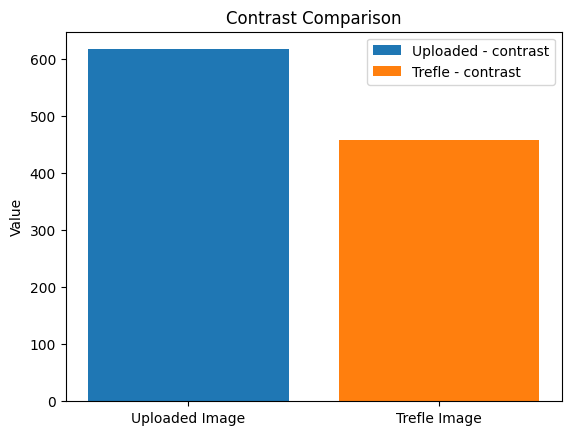


Correlation Values:
Uploaded Image: 0.915507559466015
Trefle Image: 0.9498879584339784


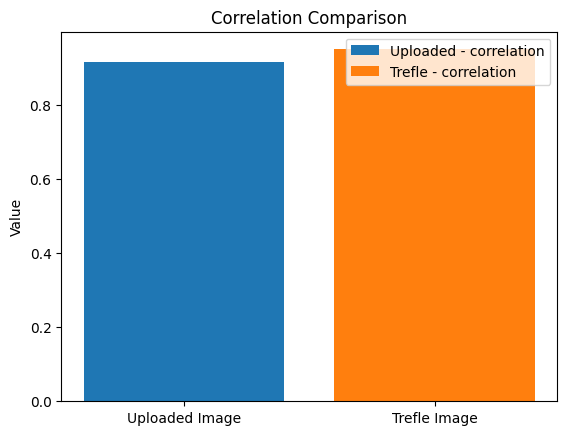


Energy Values:
Uploaded Image: 0.023948567096170742
Trefle Image: 0.021697736341107318


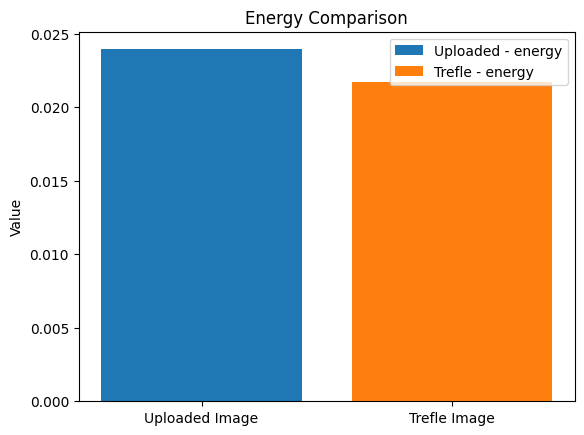


Homogeneity Values:
Uploaded Image: 0.2046420538853876
Trefle Image: 0.30094023686357385


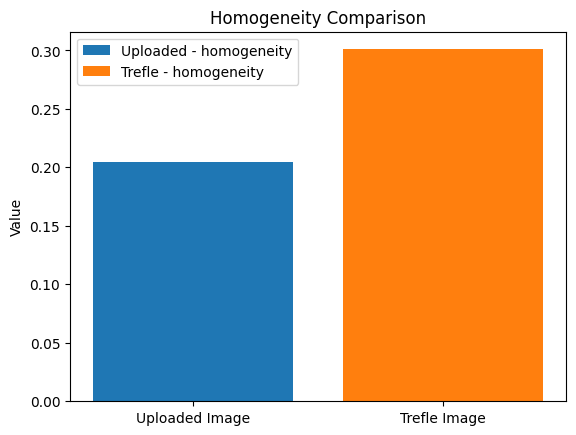

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from google.colab import files
from io import BytesIO

def calculate_glcm_properties(image_gray, distances=[1], angles=[0], properties=['contrast', 'correlation', 'energy', 'homogeneity']):
    """Calculate GLCM properties for a grayscale image."""
    glcm = graycomatrix(image_gray, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)
    return {prop: graycoprops(glcm, prop).mean() for prop in properties}

def plot_individual_glcm_properties(glcm_props_uploaded, glcm_props_trefle):
    """Plot individual GLCM properties for comparison between two images and print values."""
    properties = glcm_props_uploaded.keys()

    for prop in properties:
        uploaded_val = glcm_props_uploaded[prop]
        trefle_val = glcm_props_trefle[prop]

        # Print numerical values for clarity
        print(f"\n{prop.capitalize()} Values:")
        print(f"Uploaded Image: {uploaded_val}")
        print(f"Trefle Image: {trefle_val}")

        # Plotting
        fig, ax = plt.subplots()
        ax.bar('Uploaded Image', uploaded_val, label=f'Uploaded - {prop}')
        ax.bar('Trefle Image', trefle_val, label=f'Trefle - {prop}')

        ax.set_ylabel('Value')
        ax.set_title(f'{prop.capitalize()} Comparison')
        ax.legend()

        plt.show()

# Upload an image from your local system
uploaded = files.upload()
filename = next(iter(uploaded))

# Convert the uploaded image to a format suitable for OpenCV and GLCM calculation
uploaded_image = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_GRAYSCALE)

# Load a predefined image from the workspace
trefle_image = cv2.imread("plant_1.jpg", cv2.IMREAD_GRAYSCALE)  # Ensure 'plant_1.jpg' is available in your workspace

if uploaded_image is not None and trefle_image is not None:
    # Calculate GLCM properties for both images
    distances = [1, 2, 3]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm_props_uploaded = calculate_glcm_properties(uploaded_image, distances, angles)
    glcm_props_trefle = calculate_glcm_properties(trefle_image, distances, angles)

    # Plot the GLCM properties for comparison individually and print values
    plot_individual_glcm_properties(glcm_props_uploaded, glcm_props_trefle)
else:
    print("Error: One or both of the images could not be loaded.")



# Shape Descriptor



Saving dracaena_fragrans.jpeg to dracaena_fragrans (32).jpeg


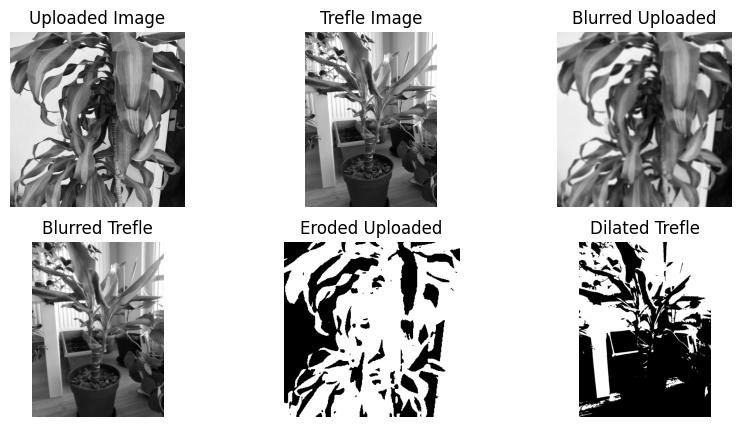

Contour-Based Features:
Uploaded Image:
Contour Area: 62414.0
Perimeter: 3858.948597073555
Trefle Image:
Contour Area: 107490.5
Perimeter: 3823.0247205495834

Bounding Box Features:
Uploaded Image:
Bounding Box (x, y, w, h): (0, 0, 300, 300)
Aspect Ratio: 1.0
Trefle Image:
Bounding Box (x, y, w, h): (248, 0, 427, 413)
Aspect Ratio: 1.0338983050847457

Convex Hull and Solidity:
Uploaded Image:
Solidity: 0.7066362488749002
Trefle Image:
Solidity: 0.7575568570240536


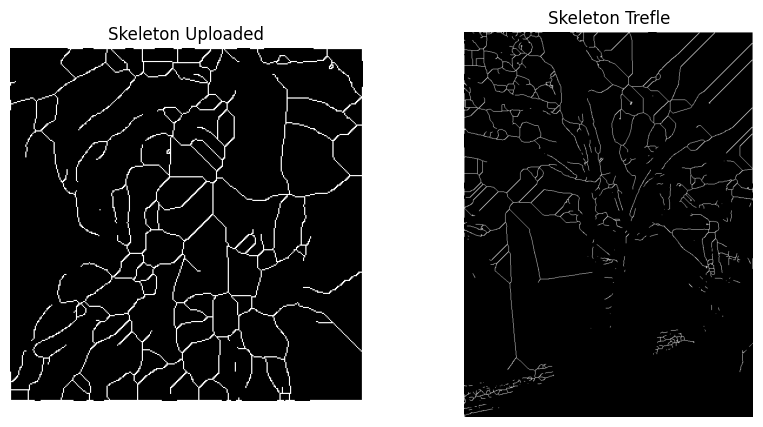

In [ ]:
from skimage import morphology

# Function to calculate Fourier descriptors
def calculate_fourier_descriptors(contour):
    fourier_descriptor = cv2.dft(np.float32(contour), flags=cv2.DFT_COMPLEX_OUTPUT)
    magnitude, _ = cv2.cartToPolar(fourier_descriptor[:, :, 0], fourier_descriptor[:, :, 1])
    return magnitude.ravel()

# Function to calculate contour-based features
def calculate_contour_features(contour):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, closed=True)
    solidity = area / cv2.contourArea(cv2.convexHull(contour))
    compactness = (perimeter ** 2) / area
    return area, perimeter, solidity, compactness

# Function to calculate bounding box features
def calculate_bounding_box_features(contour):
    x, y, width, height = cv2.boundingRect(contour)
    aspect_ratio = width / height
    return width, height, aspect_ratio

# Function to calculate convex hull features
def calculate_convex_hull_features(contour):
    convex_hull = cv2.convexHull(contour)
    hull_area = cv2.contourArea(convex_hull)
    solidity = cv2.contourArea(contour) / hull_area
    return solidity

# Function to perform skeletonization and analyze topological structure
def analyze_skeleton(image):
    skeleton = morphology.skeletonize(image > 0)
    # Perform further analysis on the skeleton if needed
    return skeleton

# Upload an image from your local system
uploaded = files.upload()
filename = next(iter(uploaded))

# Convert the uploaded image to a format suitable for OpenCV and contour detection
uploaded_image = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_GRAYSCALE)

# Define the desired width and height for resizing
desired_width = 300
desired_height = 300

# Resize the uploaded image to a standard size
resized_uploaded_image = cv2.resize(uploaded_image, (desired_width, desired_height))

# Perform image processing and contour detection for uploaded image
blurred_uploaded = cv2.GaussianBlur(resized_uploaded_image, (5, 5), 0)
_, eroded_uploaded = cv2.threshold(blurred_uploaded, 120, 255, cv2.THRESH_BINARY_INV)
contours_uploaded, _ = cv2.findContours(eroded_uploaded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour_uploaded = max(contours_uploaded, key=cv2.contourArea)

# Load a predefined image from the workspace (replace with your own preprocessing steps)
trefle_image = cv2.imread("plant_1.jpg", cv2.IMREAD_GRAYSCALE)  # Ensure 'plant_1.jpg' is available in your workspace

# Perform image processing and contour detection for Trefle image (replace with your own preprocessing steps)
blurred_trefle = cv2.GaussianBlur(trefle_image, (5, 5), 0)
_, dilated_trefle = cv2.threshold(blurred_trefle, 120, 255, cv2.THRESH_BINARY)
contours_trefle, _ = cv2.findContours(dilated_trefle, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour_trefle = max(contours_trefle, key=cv2.contourArea)

# Calculate contour-based features for uploaded image
area_uploaded, perimeter_uploaded, solidity_uploaded, compactness_uploaded = calculate_contour_features(largest_contour_uploaded)

# Calculate contour-based features for Trefle image
area_trefle, perimeter_trefle, solidity_trefle, compactness_trefle = calculate_contour_features(largest_contour_trefle)

# Calculate bounding box features for uploaded image
width_uploaded, height_uploaded, aspect_ratio_uploaded = calculate_bounding_box_features(largest_contour_uploaded)

# Calculate bounding box features for Trefle image
width_trefle, height_trefle, aspect_ratio_trefle = calculate_bounding_box_features(largest_contour_trefle)

# Calculate convex hull features for uploaded image
solidity_uploaded = calculate_convex_hull_features(largest_contour_uploaded)

# Calculate convex hull features for Trefle image
solidity_trefle = calculate_convex_hull_features(largest_contour_trefle)

# Perform skeletonization and analyze topological structure for uploaded image
skeleton_uploaded = analyze_skeleton(eroded_uploaded)

# Perform skeletonization and analyze topological structure for Trefle image
skeleton_trefle = analyze_skeleton(dilated_trefle)

# Display the preprocessed images
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1), plt.imshow(resized_uploaded_image, cmap='gray')
plt.title('Uploaded Image'), plt.axis('off')
plt.subplot(2, 3, 2), plt.imshow(trefle_image, cmap='gray')
plt.title('Trefle Image'), plt.axis('off')
plt.subplot(2, 3, 3), plt.imshow(blurred_uploaded, cmap='gray')
plt.title('Blurred Uploaded'), plt.axis('off')
plt.subplot(2, 3, 4), plt.imshow(blurred_trefle, cmap='gray')
plt.title('Blurred Trefle'), plt.axis('off')
plt.subplot(2, 3, 5), plt.imshow(eroded_uploaded, cmap='gray')
plt.title('Eroded Uploaded'), plt.axis('off')
plt.subplot(2, 3, 6), plt.imshow(dilated_trefle, cmap='gray')
plt.title('Dilated Trefle'), plt.axis('off')
plt.show()

# Other Shape Descriptors
# Contour-Based Features: Calculate contour area and perimeter
area_uploaded = cv2.contourArea(largest_contour_uploaded)
area_trefle = cv2.contourArea(largest_contour_trefle)
perimeter_uploaded = cv2.arcLength(largest_contour_uploaded, True)
perimeter_trefle = cv2.arcLength(largest_contour_trefle, True)

# Display contour-based features
print("Contour-Based Features:")
print("Uploaded Image:")
print("Contour Area:", area_uploaded)
print("Perimeter:", perimeter_uploaded)
print("Trefle Image:")
print("Contour Area:", area_trefle)
print("Perimeter:", perimeter_trefle)

# Bounding Box: Determine the bounding box around the contour
x_uploaded, y_uploaded, w_uploaded, h_uploaded = cv2.boundingRect(largest_contour_uploaded)
x_trefle, y_trefle, w_trefle, h_trefle = cv2.boundingRect(largest_contour_trefle)

# Calculate aspect ratio
aspect_ratio_uploaded = float(w_uploaded) / h_uploaded
aspect_ratio_trefle = float(w_trefle) / h_trefle

# Display bounding box features
print("\nBounding Box Features:")
print("Uploaded Image:")
print("Bounding Box (x, y, w, h):", (x_uploaded, y_uploaded, w_uploaded, h_uploaded))
print("Aspect Ratio:", aspect_ratio_uploaded)
print("Trefle Image:")
print("Bounding Box (x, y, w, h):", (x_trefle, y_trefle, w_trefle, h_trefle))
print("Aspect Ratio:", aspect_ratio_trefle)

# Convex Hull: Compute convex hull and solidity
hull_uploaded = cv2.convexHull(largest_contour_uploaded)
hull_trefle = cv2.convexHull(largest_contour_trefle)
solidity_uploaded = area_uploaded / cv2.contourArea(hull_uploaded)
solidity_trefle = area_trefle / cv2.contourArea(hull_trefle)

# Display convex hull and solidity
print("\nConvex Hull and Solidity:")
print("Uploaded Image:")
print("Solidity:", solidity_uploaded)
print("Trefle Image:")
print("Solidity:", solidity_trefle)

# Skeletonization: Skeletonize the binary image
skeleton_uploaded = cv2.ximgproc.thinning(eroded_uploaded)
skeleton_trefle = cv2.ximgproc.thinning(dilated_trefle)

# Display skeleton images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(skeleton_uploaded, cmap='gray')
plt.title('Skeleton Uploaded'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(skeleton_trefle, cmap='gray')
plt.title('Skeleton Trefle'), plt.axis('off')
plt.show()

